In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive 

In [4]:
DATA_PATH = "/content/gdrive/MyDrive/DataMining_project/data/data_differential_expression/one_vs_all/csv_format/"
PATH_BRAIN = DATA_PATH + "Brain_vs_all.csv"
PATH_TESTIS = DATA_PATH + "Testis_vs_all.csv"
PATH_SKELETALMUSCLE = DATA_PATH + "Skeletalmuscle_vs_all.csv"
PATH_OVARY = DATA_PATH + "Ovary_vs_all.csv"
PATH_BREAST = DATA_PATH + "Breast_vs_all.csv"
PATH_LIVER = DATA_PATH + "Liver_vs_all.csv"
PATH_PROSTATE = DATA_PATH + "Prostate_vs_all.csv"
PATH_RAWCOUNT = "gdrive/MyDrive/DataMining_project/data/data_reanalysis/count_v101.xlsx"

In [5]:
COL_NAMES = [
    "gene_id",           "gene_name",
    "Testis_1",          "Testis_2",          "Testis_3", 
    "Skeletal_muscle_1", "Skeletal_muscle_2", "Skeletal_muscle_3",
    "Liver_1",           "Liver_2",           "Liver_3",
    "Brain_1",           "Brain_2",           "Brain_3", 
    "Breast_1",          "Breast_2",          "Breast_3",
    "Prostate_1",        "Prostate_2",        "Prostate_3",
    "Ovary_1",           "Ovary_2",           "Ovary_3"
]

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
brain = pd.read_csv(PATH_BRAIN)
ovary = pd.read_csv(PATH_OVARY)
prostate = pd.read_csv(PATH_PROSTATE)
liver = pd.read_csv(PATH_LIVER)
breast = pd.read_csv(PATH_BREAST)
skeletal_muscle = pd.read_csv(PATH_SKELETALMUSCLE)
testis = pd.read_csv(PATH_TESTIS)

In [8]:
dfs = [brain, ovary, prostate, liver, breast, skeletal_muscle, testis]

In [9]:
PATH_SNODB = "/content/gdrive/MyDrive/DataMining_project/data/data_snodb/snoDB_All_V2.0.tsv"
snodb = pd.read_csv(PATH_SNODB, sep="\t")

In [10]:
def filter_ds(
    ds_to_filter: pd.DataFrame,
    db_snorna: pd.DataFrame
):
    
    """
    Filter a dataset and return some useful information.

    Given a dataframe resulted from deseq2 return some 
    useful information (such as number of snoRNAs etc...). 

    Parameters
    ----------
    ds_to_filter : pd.DataFrame
        Pandas dataframe with ENSEMBL genes as rows and samples as columns. 
    db_snorna : pd.DataFrame
        Pandas dataframe containing snoDB information, with genes as rows and
        gene attributes as columns.
    min_exp : float
        Float representing the number of TPM to consider a gene expressed.
    min_samples : float
        Float representing the fraction of samples that must have the gene
        expressed in order for the gene to be retained.

    Returns
    -------
    ds_filtered : pd.DataFrame
        Pandas dataframe corresponding to the starting dataframe filtered using
        the provided parameters.
    filt_info : dict
        Dictionary containing information about the filtering process.
    """

    # Initialize counters to increment
    filt_info = {
        "num_genes": 0,
        "num_snorna": 0,
        "num_hosts": 0,
        "num_host_less": 0,
        "num_paired": 0,
    }

    genes_filt = list(ds_to_filter["gene_id"])# List of genes differentially expressed 
    snorna_list = list(db_snorna["ensembl_id"])  # List of snorna in db
    host_list = list(db_snorna["host_gene_id"])  # List of hosts in db

    filt_info["num_genes"] = len(genes_filt)
    
    for gene in genes_filt:
        
        significant = False  # Is either snorna gene or host
        
        # If gene is a snorna
        if gene in snorna_list:
            significant = True
            filt_info["num_snorna"] += 1
            
            # Retrieve host gene
            pos = db_snorna["ensembl_id"]  
            host_gene = db_snorna.loc[pos == gene, "host_gene_id"].item()

            if host_gene in genes_filt:  # Host gene is in filtered genes
                filt_info["num_paired"] += 1

            if type(host_gene) == float:  # If host gene type is NaN 
                filt_info["num_host_less"] += 1

        # If gene is a host gene
        if gene in host_list:
            significant = True
            filt_info["num_hosts"] += 1      

    return filt_info, list(filt_info.keys())

In [11]:
tissues = ['brain', 'ovary', 'prostate', 'liver', 'breast', 'skeletal_muscle', 'testis']

In [12]:
iteration = 0

for df in dfs:
  tissues[iteration] = dict()
  info, names = filter_ds(df, snodb)
  print(info)
  tissues[iteration] = info
  iteration += 1

{'num_genes': 7940, 'num_snorna': 300, 'num_hosts': 276, 'num_host_less': 28, 'num_paired': 130}
{'num_genes': 5400, 'num_snorna': 149, 'num_hosts': 172, 'num_host_less': 4, 'num_paired': 48}
{'num_genes': 2438, 'num_snorna': 13, 'num_hosts': 80, 'num_host_less': 2, 'num_paired': 0}
{'num_genes': 8599, 'num_snorna': 44, 'num_hosts': 281, 'num_host_less': 4, 'num_paired': 34}
{'num_genes': 1454, 'num_snorna': 33, 'num_hosts': 48, 'num_host_less': 0, 'num_paired': 0}
{'num_genes': 8401, 'num_snorna': 45, 'num_hosts': 318, 'num_host_less': 4, 'num_paired': 11}
{'num_genes': 9970, 'num_snorna': 190, 'num_hosts': 333, 'num_host_less': 7, 'num_paired': 55}


In [13]:
TISSUES = ['brain', 'ovary', 'prostate', 'liver', 'breast', 'skeletal_muscle', 'testis']
data = pd.DataFrame(tissues)
data = data.apply(np.log)
data.replace(-np.inf, 0, inplace=True)
data.insert(0, 'tissue', TISSUES)
data

,tissue,num_genes,num_snorna,num_hosts,num_host_less,num_paired
0,brain,8.979669,5.703782,5.620401,3.332205,4.867534
1,ovary,8.594154,5.003946,5.147494,1.386294,3.871201
2,prostate,7.798933,2.564949,4.382027,0.693147,0.000000
3,liver,9.059401,3.784190,5.638355,1.386294,3.526361
4,breast,7.282074,3.496508,3.871201,0.000000,0.000000
5,skeletal_muscle,9.036106,3.806662,5.762051,1.386294,2.397895
6,testis,9.207336,5.247024,5.808142,1.945910,4.007333


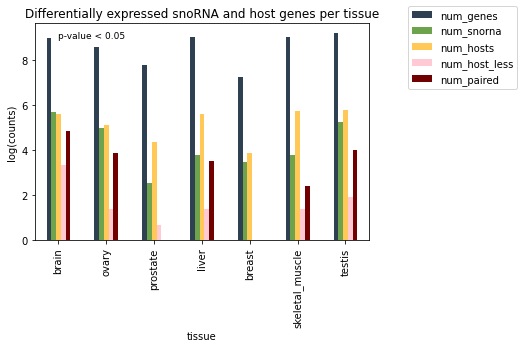

In [29]:
#data.plot.bar(x='tissue', color = ['#2E4052','#6DA34D','#FFC857', '#FFCAD4', '#710000'])

x = np.arange(len(TISSUES))  # the label locations
width = 0.20  # the width of the bars

ax = data.plot.bar(x='tissue', color = ['#2E4052','#6DA34D','#FFC857', '#FFCAD4', '#710000'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log(counts)')
ax.set_title('Differentially expressed snoRNA and host genes per tissue')
ax.text(0, 9, r'p-value < 0.05', fontsize=9)
ax.legend(loc = 'upper right')
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)


plt.savefig("de_counts.png", dpi=300, bbox_inches='tight')
plt.show()